## House Price prediction using Simple Linear Regression model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns #for enhanced data visualisation
from sklearn.model_selection import train_test_split # for slpitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # for building model
from sklearn.metrics import mean_squared_error, r2_score # for model evaluation

In [3]:
#step 1: Load the dataset
data = pd.read_csv("D:\Abhishek\ML projects\Simple_linear_regression\mock_linear_regression_data.csv")

In [4]:
data.head()

,area,amount
0,2185.430535,102471.27950
1,4778.214379,241233.25590
2,3793.972738,192629.36160
3,3193.963179,152554.64480
4,1202.083882,78761.93921


In [5]:
#Step 2: rename coulumns
data.rename(columns={'area':'area_sq_ft', 'amount':'Price'}, inplace=True)

In [6]:
# Step 3: Remove Unwanted Columns (Keeping only relevant ones)
columns_to_keep = ['area_sq_ft','Price']
data = data[columns_to_keep]

In [7]:
data.head()

,area_sq_ft,Price
0,2185.430535,102471.27950
1,4778.214379,241233.25590
2,3793.972738,192629.36160
3,3193.963179,152554.64480
4,1202.083882,78761.93921


In [8]:
# Step 4: Check for Missing Values
print("missing values before cleaning:")
print(data.isnull().sum()) # display count of missing values

missing values before cleaning:
area_sq_ft    0
Price         0
dtype: int64


In [9]:
# Step 5: Handle Missing Values
if data.isnull().sum().sum() > 0:
    data.dropna(inplace=True) #drop rows with missing 
    print("missing values after cleaning:")
    print(data.isnull().sum())
else:
    print("No missing values found")

No missing values found


In [10]:
data.shape
data.info() # check for missing values and data types
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_sq_ft  200 non-null    float64
 1   Price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,area_sq_ft,Price
count,200.000000,200.000000
mean,2678.028050,134575.545159
std,1327.011440,66826.283627
min,524.849527,18110.463970
25%,1528.620866,74636.427765
50%,2725.188140,131289.492350
75%,3905.868272,193823.029075
max,4940.991215,259548.001100


C:\Users\Abhi\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


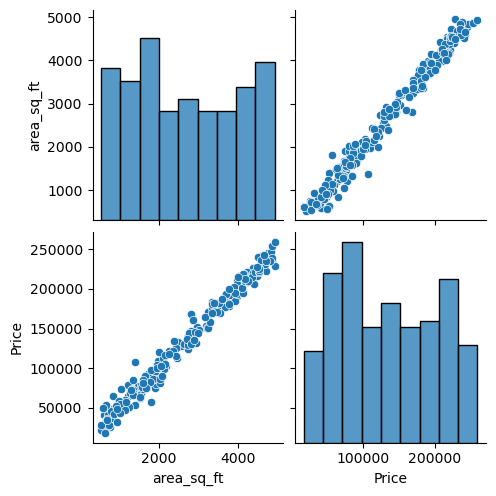

In [11]:
sns.pairplot(data)

In [12]:
### Step 6: Detect and Remove Outliers using IQR Method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1 #interquartile range

In [13]:
### define bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [14]:
### filter data within bounds
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

print("Data after removing outliers:")
print(data.describe())

In [16]:
data.shape

(200, 2)

In [17]:
# Step 7: Exploratory Data Analysis (EDA)
print(data.info())  # Check for missing values and data types
print(data.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_sq_ft  200 non-null    float64
 1   Price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None
        area_sq_ft          Price
count   200.000000     200.000000
mean   2678.028050  134575.545159
std    1327.011440   66826.283627
min     524.849527   18110.463970
25%    1528.620866   74636.427765
50%    2725.188140  131289.492350
75%    3905.868272  193823.029075
max    4940.991215  259548.001100


C:\Users\Abhi\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


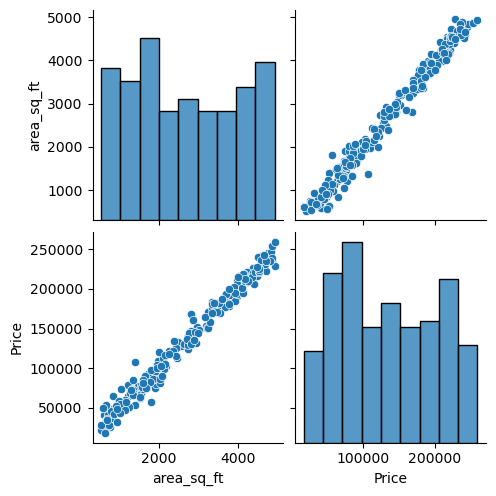

In [18]:
sns.pairplot(data)

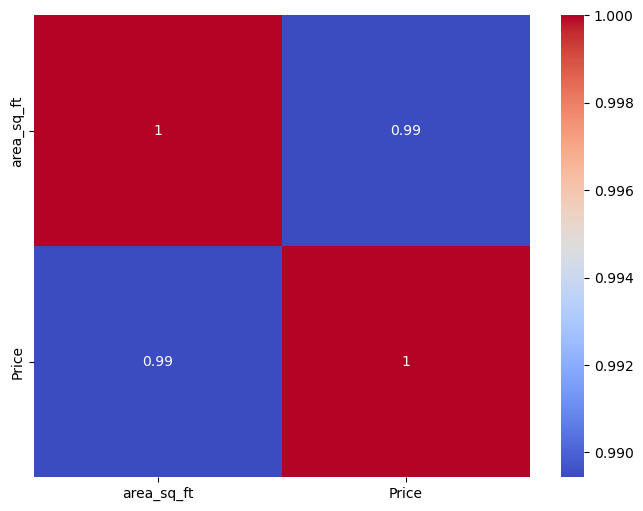

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True , cmap = 'coolwarm') # colrelation heatmap
plt.show()

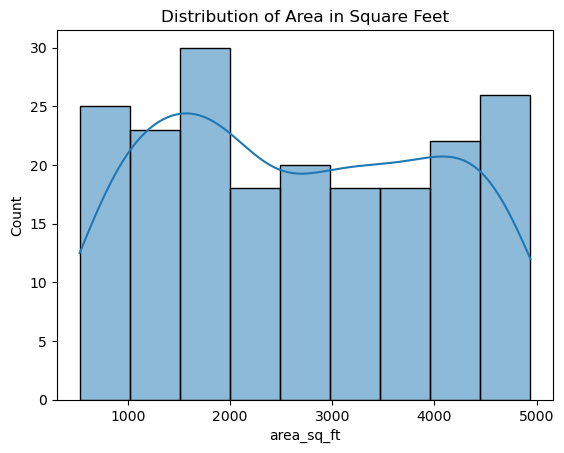

In [20]:
# Step 8: Check Data Distribution (Optional but Recommended)
sns.histplot(data['area_sq_ft'], kde=True)
plt.title("Distribution of Area in Square Feet")
plt.show()

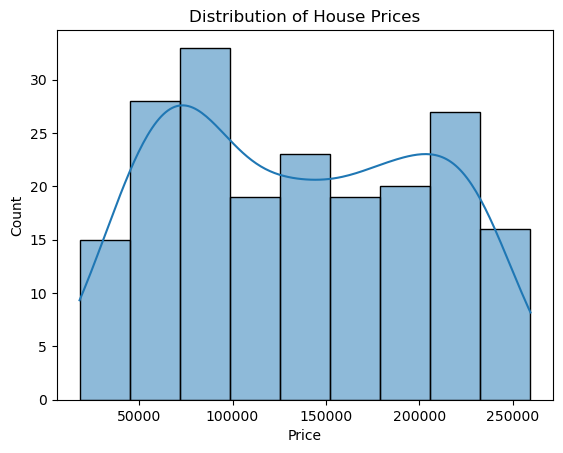

In [21]:
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

In [22]:
# Step 9: Select the Feature (Independent Variable) and Target Variable (Dependent Variable)
X = data[['area_sq_ft']]
y = data['Price']

In [23]:
# Step 10: Split the Dataset into Training and Testing Sets (80% Train, 20% Test)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [24]:
# Step 11: Train the Simple Linear Regression Model
model = LinearRegression() #initialize the model
model.fit(X_train,y_train) #Train the model on training set

LinearRegression()

In [25]:
# Step 12: Make Predictions
y_pred = model.predict(X_test)  # Predict house prices on the test set

In [26]:
# Step 13: Evaluate the Model
mse = mean_squared_error(y_test, y_pred) #compute mean squared error
rmse = np.sqrt(mse) # compute Root mean squared error
r2 = r2_score(y_test, y_pred) # Compute R-squared value (model accuracy)

In [27]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 108462386.26
Root Mean Squared Error: 10414.53
R-squared Score: 0.97


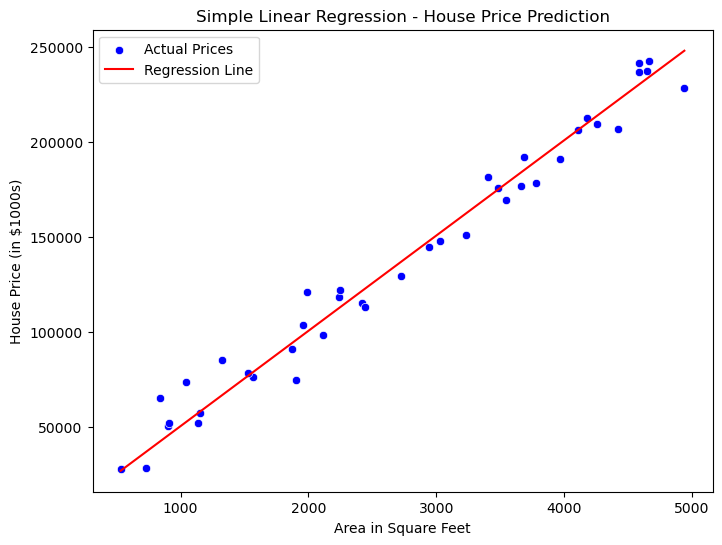

In [58]:
# Step 14: Visualizing the Regression Line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['area_sq_ft'], y=y_test, color='blue', label='Actual Prices')  # Plot actual house prices
sns.lineplot(x=X_test['area_sq_ft'], y=y_pred, color='red', label='Regression Line')  # Plot the regression line
plt.xlabel("Area in Square Feet")
plt.ylabel("House Price (in $1000s)")
plt.title("Simple Linear Regression - House Price Prediction")
plt.legend()
plt.show()

In [64]:
# Step 15: Making a New Prediction
new_data = np.array([[2000]])  # Example: Predicting house price for a house with 2000 sq ft
predicted_price = model.predict(new_data)
print(f"Predicted house price for 2000 sq ft: ${predicted_price[0]:.2f}")

Predicted house price for 2000 sq ft: $100494.38


C:\Users\Abhi\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
import pickle

In [69]:
pickle.dump(model,open('house_price_pred_slr.pkl','wb'))